In [2]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# read in the data

df = pd.read_csv(r'C:\Users\OKPUTU BEMENGA\Documents\Pandas\movies.csv')

In [6]:
#looking at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [8]:
# checking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [11]:
# Data types for our colmns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [17]:
# changing budget from float data type to int data type(did not work)

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [56]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.40,927000.00,2589,4014,1047,54,19000000.00,46998772.00,2319,146.00
1,5573,6,1,1980,1492,5.80,65000.00,2269,1632,327,55,4500000.00,58853106.00,731,104.00
2,5142,4,0,1980,1771,8.70,1200000.00,1111,2567,1745,55,18000000.00,538375067.00,1540,124.00
3,286,4,4,1980,1492,7.70,221000.00,1301,2000,2246,55,3500000.00,83453539.00,1812,88.00
4,1027,6,4,1980,1543,7.30,108000.00,1054,521,410,55,6000000.00,39846344.00,1777,98.00


In [23]:
# used to move it from scientific numbers to normal figures
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [58]:
# grouping by gross in desccending order
df.sort_values(by = ['gross'], inplace = False, ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.80,1100000.00,1155,1778,2334,55,237000000.00,2847246203.00,2253,162.00
7445,535,5,0,2019,183,8.40,903000.00,162,743,2241,55,356000000.00,2797501328.00,1606,181.00
3045,6896,5,6,1997,704,7.80,1100000.00,1155,1778,1595,55,200000000.00,2201647264.00,2253,194.00
6663,5144,5,0,2015,698,7.80,876000.00,1125,2550,524,55,245000000.00,2069521700.00,1540,138.00
7244,536,5,0,2018,192,8.40,897000.00,162,743,2241,55,321000000.00,2048359754.00,1606,149.00


In [25]:
# viewing the entire dataset 

pd.set_option('display.max_rows', None)

In [30]:
# removing year_corrected because it wasn't needed
df.drop('year_corrected', inplace=True, axis = 1)

Text(0, 0.5, 'Budget for Film')

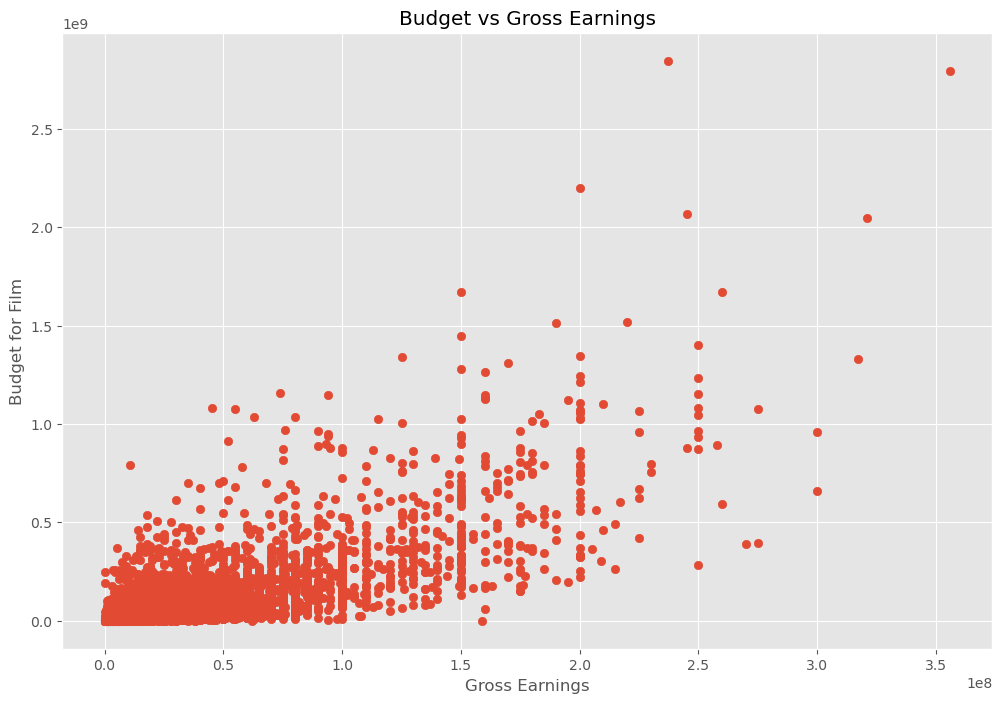

In [39]:
# Scatter plot with budget vs gross revenue

plt.scatter(x = df['budget'], y = df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

<Axes: xlabel='budget', ylabel='gross'>

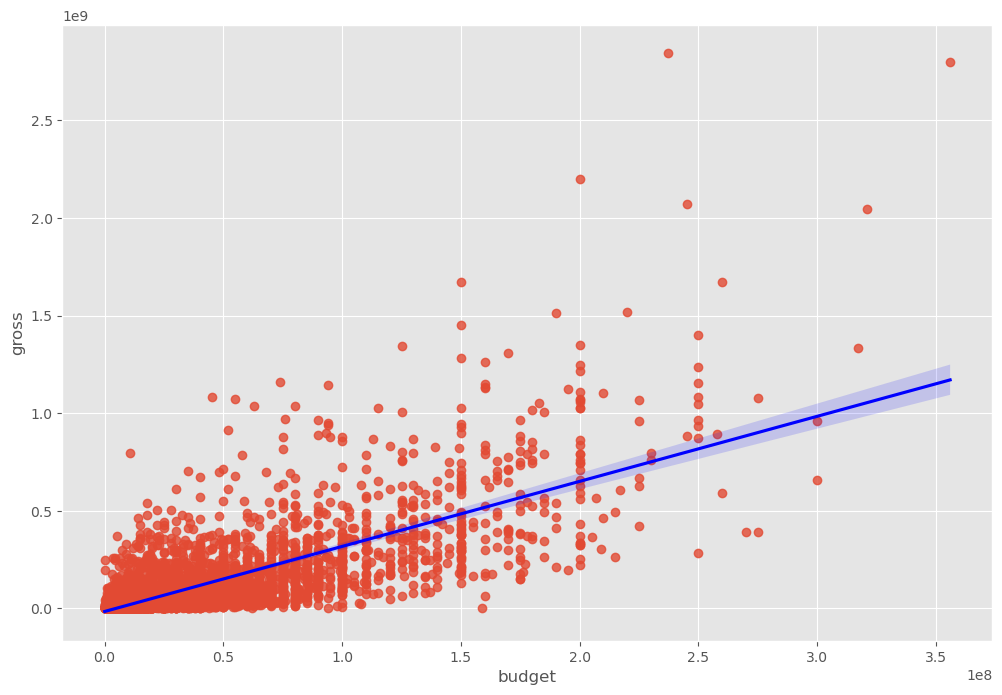

In [42]:
# pplot budget vs gross using regression plot

sns.regplot(x = 'budget', y = 'gross', data = df, line_kws = {'color':'blue'})

In [47]:
# Looking at the corrolation numbers

df.corr(method = 'pearson')

C:\Users\OKPUTU BEMENGA\AppData\Local\Temp\ipykernel_14280\3760136866.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'pearson')


,year,score,votes,budget,gross,runtime
year,1.00,0.10,0.22,0.33,0.26,0.12
score,0.10,1.00,0.41,0.08,0.19,0.40
votes,0.22,0.41,1.00,0.44,0.63,0.31
budget,0.33,0.08,0.44,1.00,0.74,0.32
gross,0.26,0.19,0.63,0.74,1.00,0.25
runtime,0.12,0.40,0.31,0.32,0.25,1.00


C:\Users\OKPUTU BEMENGA\AppData\Local\Temp\ipykernel_14280\167290579.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method = 'pearson')


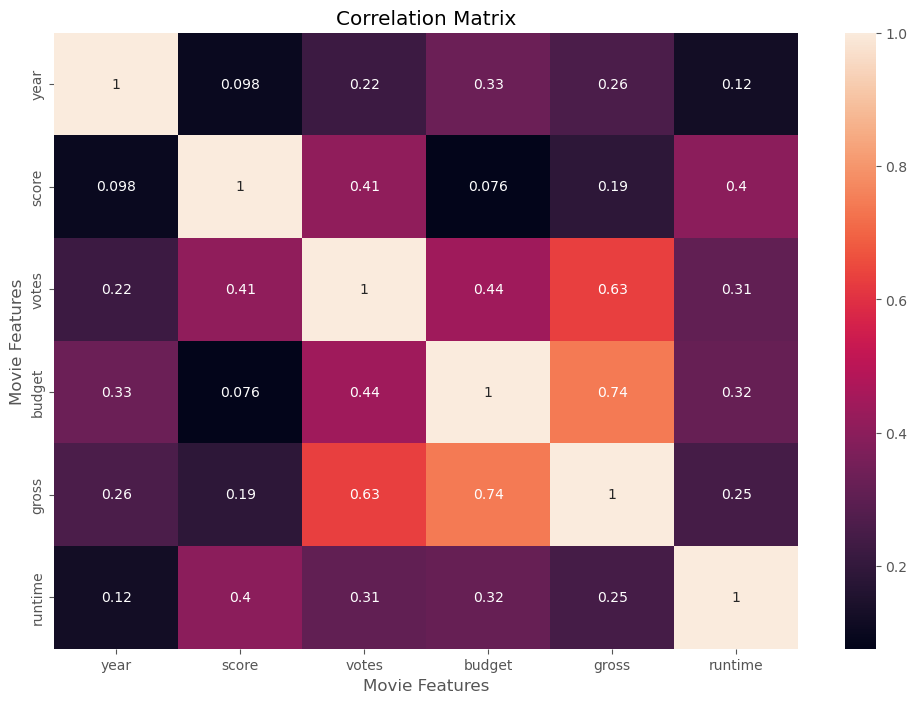

In [49]:
# correlation visualisation
# from the correlation we can say that 74% of change in gross revenue can be attributed to an increase in budget
# also from the correlation we can say that 63% of change in gross revenue can be attribted to higher votes
correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [55]:
# looking at companies
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

In [57]:
df.sort_values(by = ['score'], ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2443,6585,6,6,1994,2858,9.30,2400000.00,872,4014,2617,55,25000000.00,28817291.00,599,142.00
5243,5725,5,0,2008,1476,9.00,2400000.00,483,2265,442,55,185000000.00,1005973645.00,2319,152.00
2247,4744,6,3,1993,1068,8.90,1200000.00,2660,4194,1607,55,22000000.00,322161245.00,2281,195.00
2444,4387,6,5,1994,2858,8.90,1900000.00,2248,3451,1318,55,8000000.00,213928762.00,1657,154.00
4245,6221,5,0,2003,680,8.90,1700000.00,2193,1745,730,34,94000000.00,1146030912.00,1713,201.00
